<a href="https://colab.research.google.com/github/Tomas-Pompa/Data-science/blob/main/HW_08_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 8

## Data exploration

We explore the data set of students performance in exams.

dataset: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

First we download the data from Kaggle.

In [99]:
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
os.environ['KAGGLE_USERNAME'] = 'amllogin'
os.environ['KAGGLE_KEY'] = '35eca611ac64064016cba986e2161cdd'

!kaggle datasets download -d spscientist/students-performance-in-exams -p {'.'}

students-performance-in-exams.zip: Skipping, found more recently modified local copy (use --force to force download)


In [101]:
dataset_path = '/content/data/'

with zipfile.ZipFile('students-performance-in-exams.zip', 'r') as zip_ref:
    zip_ref.extractall(dataset_path)

In [102]:
csv_filepath = dataset_path + 'StudentsPerformance.csv'
df = pd.read_csv(csv_filepath)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## First look at the data

At the beginning, we explore the data set.

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [104]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

From the code above we can see that there are no missing values in our data set.

Now we take a look at the categorical variables.

In [105]:
print(df['parental level of education'].unique())
print(df['test preparation course'].unique())
print(df['race/ethnicity'].unique())
print(df['lunch'].unique())
print(df['gender'].unique())

["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['none' 'completed']
['group B' 'group C' 'group A' 'group D' 'group E']
['standard' 'free/reduced']
['female' 'male']


female    518
male      482
Name: gender, dtype: int64


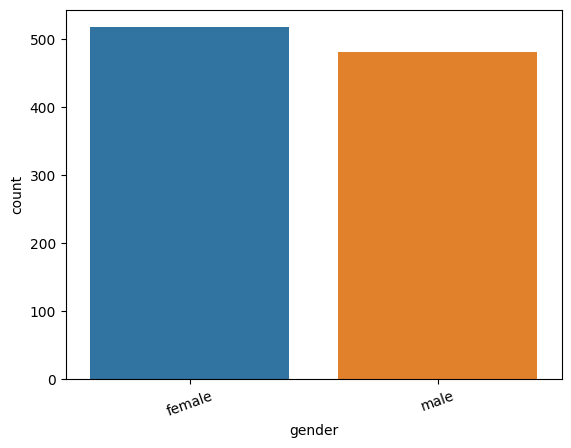

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64


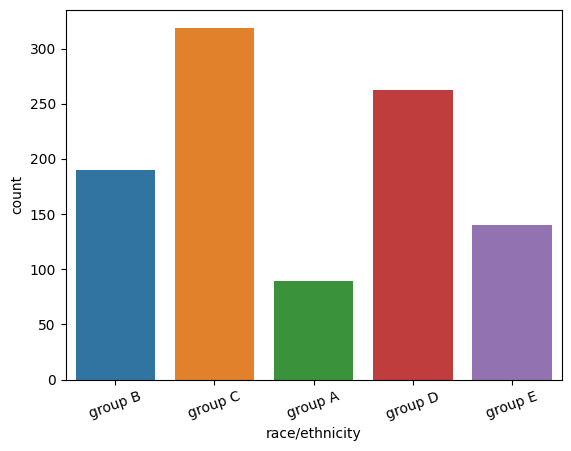

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64


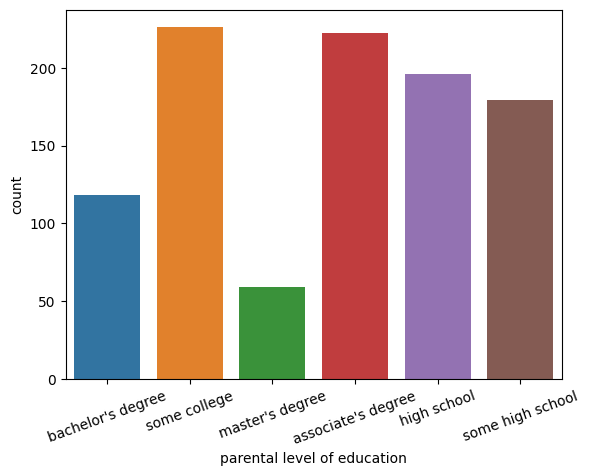

standard        645
free/reduced    355
Name: lunch, dtype: int64


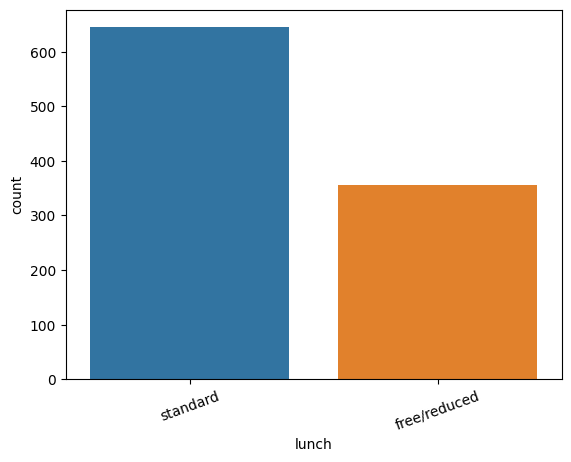

none         642
completed    358
Name: test preparation course, dtype: int64


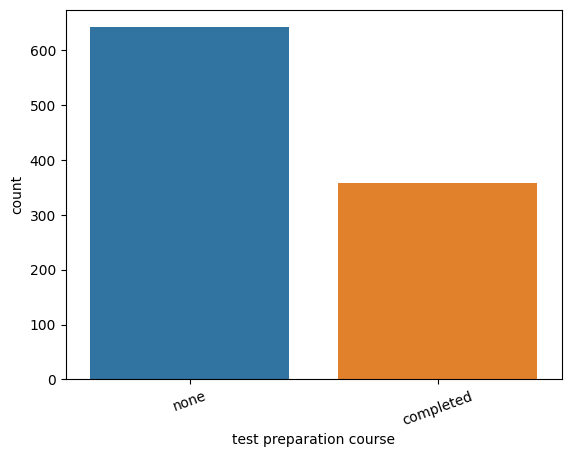

In [106]:
for column in list(df.columns)[:5]:
  sns.countplot(df, x = column)
  plt.xticks(rotation = 20)
  print(df[column].value_counts())
  plt.show()

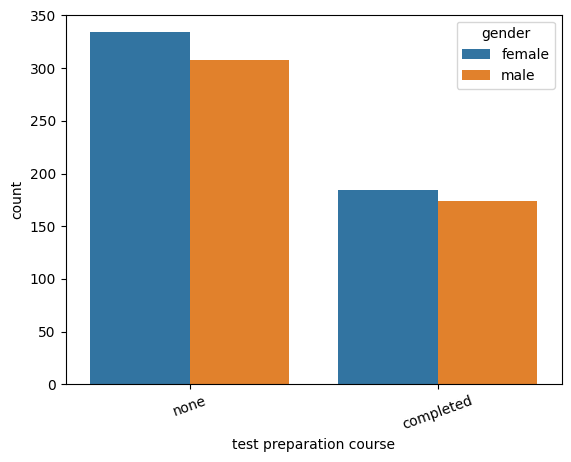

In [107]:
sns.countplot(df, x = 'test preparation course', hue = 'gender')
plt.xticks(rotation = 20)
plt.show()

There is no clear difference between males and females in attending the test preparation course.

Now we explore the numerical variables

In [108]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


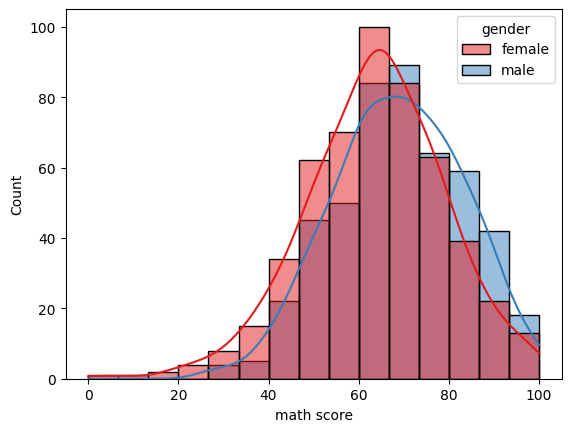

In [109]:
sns.histplot(data = df, x = 'math score', hue = 'gender', palette='Set1',
             bins = 15, kde = True)
plt.show()

From the histogram above we can see that males have slightly better results in math part of the exam.

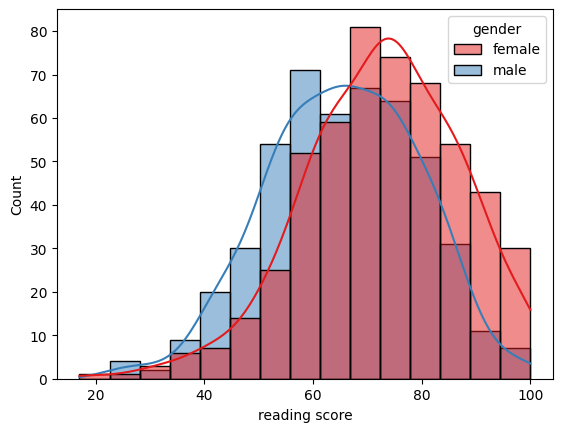

In [110]:
sns.histplot(data = df, x = 'reading score', hue = 'gender', palette='Set1',
             bins = 15, kde = True)
plt.show()

On the other hand, females have higher score in reading part on average.

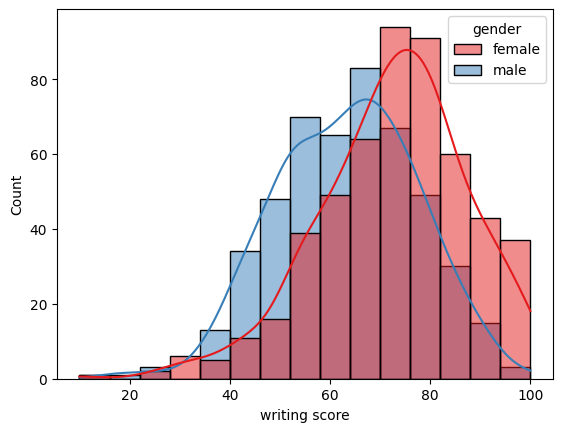

In [111]:
sns.histplot(data = df, x = 'writing score', hue = 'gender', palette='Set1',
             bins = 15, kde = True)
plt.show()

Again, females are on average better in writing part of the exam.

Now we would like to know if there is a difference in scores from exam between the participants that attended the test preparation course and the ones that did not.

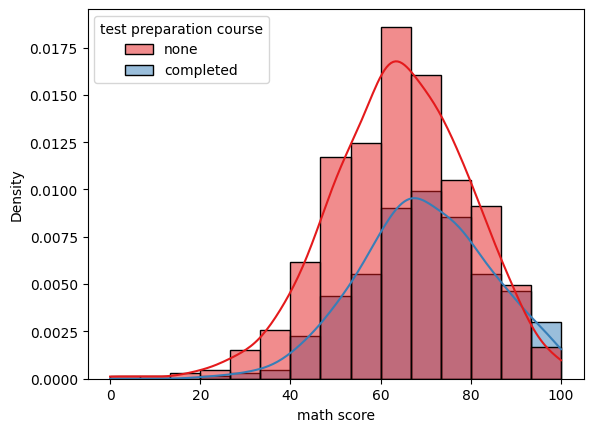

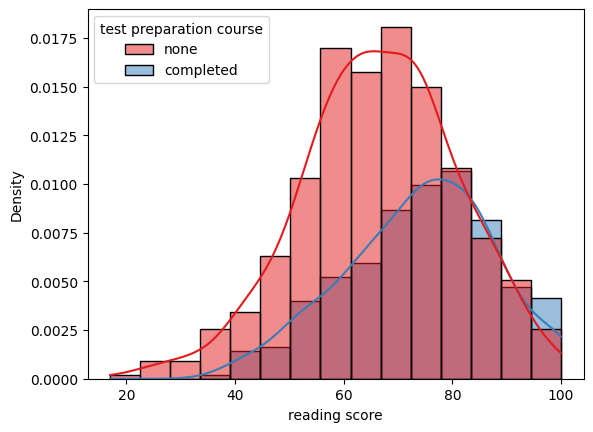

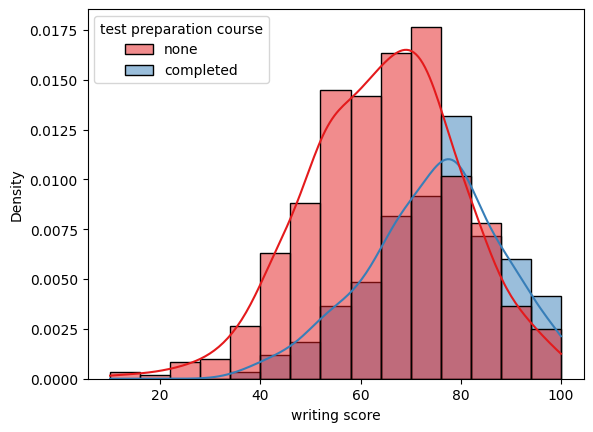

In [112]:
for column in list(df.columns)[5:8]:
  sns.histplot(data = df, x = column, hue = 'test preparation course', palette='Set1',
              bins = 15, kde = True, stat = 'density')
  plt.show()

It can be seen that participants with preparation course have slightly better score in all three parts, especially in reading and writing.

In [113]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-113-935c2e534e54>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


All three numerical variables are strongly correlated.

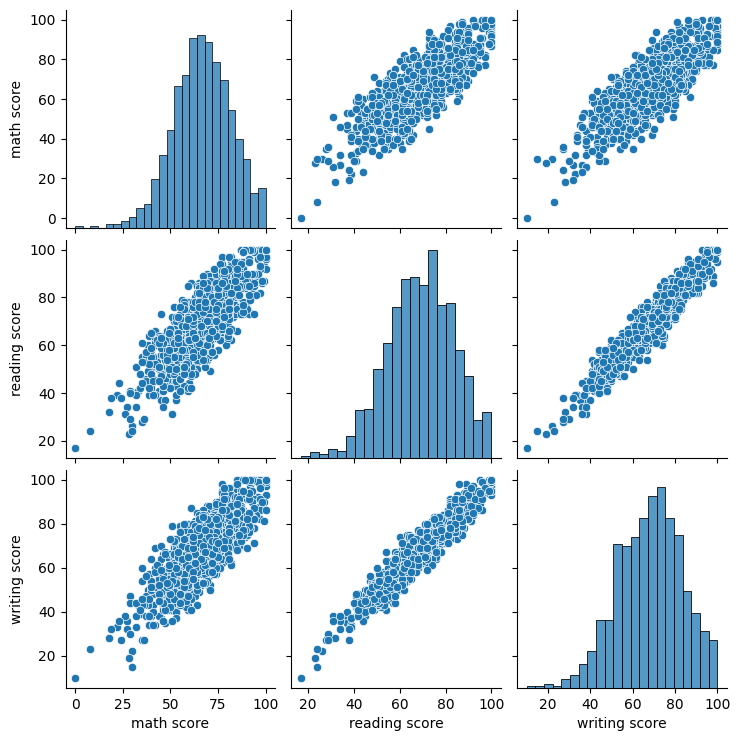

In [114]:
sns.pairplot(df)

### Interesting questions:

- Are there any nerds?

In [115]:
df.loc[(df['math score'] == 100) & (df['reading score'] == 100) & (df['writing score'] == 100)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
458,female,group E,bachelor's degree,standard,none,100,100,100
916,male,group E,bachelor's degree,standard,completed,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100


- Are there any dummies?

In [116]:
df.loc[(df['math score'] == 0) | (df['reading score'] == 0) | (df['writing score'] == 0)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10
